<br>
<img src="https://sites.google.com/a/chesterqualls.com/chester-qualls-is-it/ChesterQualls%20Logo%28small%29.png?revision=2">
<br>
***
# Demographic Info on A Mind

> This demographic info is based on "clean data" as determined from the R Code done by JW, there may be remaining questions that need to be answered before this can be considered completely accurate.

> * This document includes python(and certain libraries) code, please ignore that part if you desire.

> * The first section of this document involved loading required libraries and data, some sample charts and analysis below that.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
    
import os

from pandas import Series, DataFrame
from pylab import rcParams

#This next line supresses warning message, which may be nice before exporting to send
pd.options.mode.chained_assignment = None
#pd.set_option('chained_assignment','warn')

os.chdir("c:/Users/Chester Qualls/Desktop/Customers/EDU_Example")

print (os.getcwd())

c:\Users\Chester Qualls\Desktop\Customers\EDU_Example


In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

In [3]:
#Let's pull up our clean enrollment data
am_enroll_clean = pd.read_csv('clean_data/am_enroll_clean.csv')

print ('Finished')
#am_enroll_clean

Finished


C:\Users\Chester Qualls\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (8,15,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## We'll start with some enrollment based stats

> First is the combined data from cohort 1 and comp filtered by ['gradelevel'] == 9.  We are looking at the gender breakdowns with percentages at the top of each bar.

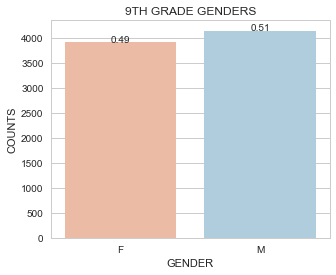

In [4]:
am_enroll_clean_9 = am_enroll_clean.loc[am_enroll_clean['gradelevel'] == 9]

am_enroll_clean_9.loc[:, 'gender'].replace([1, 0], ['M','F'], inplace=True)

total = float(len(am_enroll_clean_9))
rcParams['figure.figsize'] = 5, 4
ax = sb.countplot(x='gender',data=am_enroll_clean_9 , order=('F','M'), palette='RdBu')
plt.title('9TH GRADE GENDERS')
plt.xlabel('GENDER')
plt.ylabel('COUNTS')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 

> Using this data and pivot tables we will get some aggregates by grade level and if they are an IA student, looking at the data by gender.  In the first table we have average days present.  In the second we have the count of students by the criteria.
> * I had hopes of making these tables more presentable. Played around for a while with a table plot tool, that didn't work but I did find ways to alter some of the display characteristics of tables.  I'll show a few of those.

In [5]:
am_enroll_clean_up = am_enroll_clean.loc[(am_enroll_clean['gradelevel'] == 9)|(am_enroll_clean['gradelevel'] == 10)|
    (am_enroll_clean['gradelevel'] == 11)|(am_enroll_clean['gradelevel'] == 12)]

am_enroll_clean_up.loc[:, 'gender'].replace([1, 0], ['M','F'], inplace=True)
am_enroll_clean_up.loc[:, 'is_ia'].replace([1, 0], ['Y','N'], inplace=True)

am_enroll_pivot_genders = pd.pivot_table(am_enroll_clean_up, values=['numdayspresent'], index=['gradelevel','is_ia'], 
                                          columns=['gender'], aggfunc=np.mean)

am_enroll_pivot_genders.style.set_properties(**{'background-color': '#d3d3d3',
                           'color': 'white',
                           'border-color': '#2f4f4f'})

> This next table shows some counts by grade and if they are in an intensified algebra course or not.  Totals are by gender.  
> * The Max for each column is shown in yellow.

In [6]:
am_enroll_clean_up = am_enroll_clean.loc[(am_enroll_clean['gradelevel'] == 9)|(am_enroll_clean['gradelevel'] == 10)|
    (am_enroll_clean['gradelevel'] == 11)|(am_enroll_clean['gradelevel'] == 12)]

am_enroll_clean_up.loc[:, 'gender'].replace([1, 0], ['M','F'], inplace=True)
am_enroll_clean_up.loc[:, 'is_ia'].replace([1, 0], ['Y','N'], inplace=True)

am_enroll_pivot_genders = pd.pivot_table(am_enroll_clean_up, values=['researchid'], index=['gradelevel','is_ia'], 
                                          columns=['gender'], aggfunc='count')


am_enroll_pivot_genders.style.set_properties(**{'background-color': '#d3d3d3',
                           'color': 'black',
                           'border-color': '#d3d3d3'}).highlight_max(axis=0)

> Here we are looking at the combined data filtered ['gradelevel'] == 9. We are looking at the federal race rollup names with percentages represented on the top of each bar.

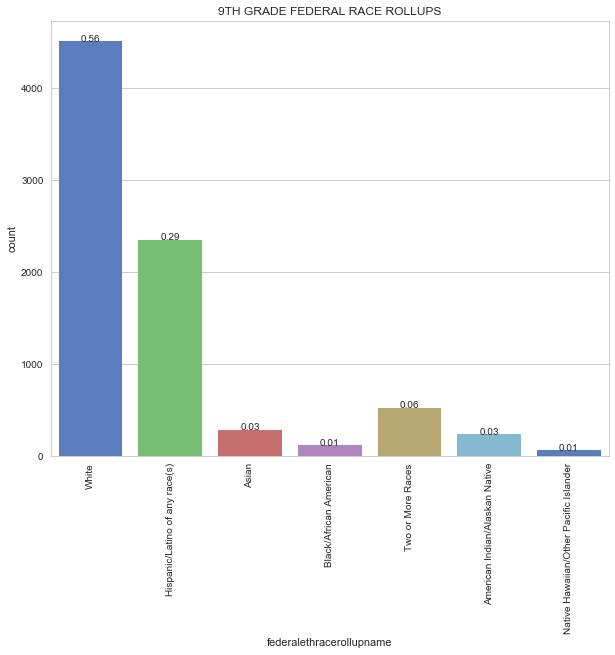

In [7]:
am_enroll_clean_9 = am_enroll_clean.loc[am_enroll_clean['gradelevel'] == 9]
total = float(len(am_enroll_clean_9))
rcParams['figure.figsize'] = 10, 8
ax = sb.countplot(x='federalethracerollupname',data=am_enroll_clean_9 , palette='muted')
plt.title('9TH GRADE FEDERAL RACE ROLLUPS')
plt.xticks(rotation=90)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 

> Here we are looking at the combined data filtered ['gradelevel'] == 9 and ['is_ia']==1. We are looking at the federal race rollup names with percentages represented on the top of each bar. This is similar to above race rollup analysis but only for those students in the Intensified Algebra courses.

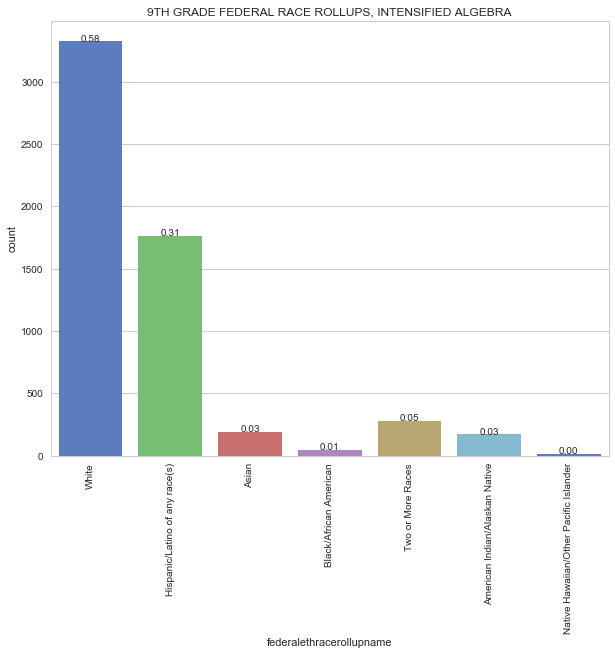

In [8]:
am_enroll_clean_9 = am_enroll_clean.loc[(am_enroll_clean['gradelevel'] == 9) & (am_enroll_clean['is_ia']==1)]
total = float(len(am_enroll_clean_9))
rcParams['figure.figsize'] = 10, 8
ax = sb.countplot(x='federalethracerollupname',data=am_enroll_clean_9 , palette='muted')
plt.title('9TH GRADE FEDERAL RACE ROLLUPS, INTENSIFIED ALGEBRA')
plt.xticks(rotation=90)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 


> Here is a pivot table which shows some counts by race rollup names.
> * The table is displayed as a heatmap
* The largest numbers for each column are in dark orange, which since we are using Totals those are the highest number.  
* Other large numbers show as darker than those which are lower.

In [9]:
am_enroll_clean_up = am_enroll_clean.loc[(am_enroll_clean['gradelevel'] == 9)|(am_enroll_clean['gradelevel'] == 10)|
    (am_enroll_clean['gradelevel'] == 11)|(am_enroll_clean['gradelevel'] == 12)]

am_enroll_clean_up.loc[:, 'is_ia'].replace([1, 0], ['Y','N'], inplace=True)

am_enroll_grade_ia = pd.pivot_table(am_enroll_clean_up, values=['researchid'], index=['gradelevel','is_ia'], 
                                    columns=['federalethracerollupname'],margins=True,margins_name='Totals', 
                                    aggfunc='count')

#Do some formatting, apply a heatmap to the data in any color. Of course the totals are the largest number here.
cm = sb.light_palette("orange", as_cmap=True)


am_enroll_grade_ia.style.background_gradient(cmap=cm)                            

> Here we are looking at the combined data filtered ['gradelevel'] == 9. We are looking at the ELL breakdown for 9th graders.

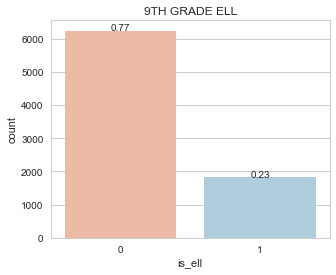

In [10]:
am_enroll_clean_9 = am_enroll_clean.loc[am_enroll_clean['gradelevel'] == 9]
total = float(len(am_enroll_clean_9))
rcParams['figure.figsize'] = 5, 4
ax = sb.countplot(x='is_ell',data=am_enroll_clean_9 , palette='RdBu')
plt.title('9TH GRADE ELL')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 

### Next let's bring in some Assessment data to analyize.

In [11]:
#First clean up some dataframes we don't need
del am_enroll_clean_9
del am_enroll_clean_up
del am_enroll_pivot_genders
del am_enroll_grade_ia

print ('Finished')

Finished


In [15]:
#Let's pull up our clean assess data
am_assess_clean = pd.read_csv('clean_data/am_assess_clean.csv')

print ("Finished")

Finished


In [16]:
#Combine it with our enrollment data, in this process we may lose some assessments be
am_enroll_assess = pd.merge(am_enroll_clean, am_assess_clean, how='inner', on=['researchid','schoolcode', 'schoolyear'])

print ('Finished')
#am_enroll_assess

Finished


In [17]:
#No longer need the enroll_clean dataframe
del am_enroll_clean

print ('Finished')

Finished


> Here we are looking at the joined data of enrollment and assessment files filtered 
* ['testgrade'] == 8 & 
* ['testtype']=='SBA' & 
* ['performancelevel']=='L2'. <br><br> We are looking at the Gender breakdown for this group.

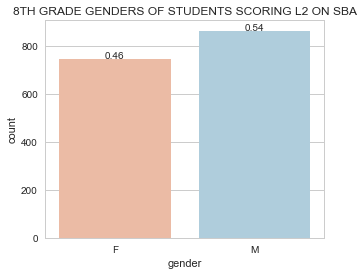

In [18]:
am_assess_8 = am_enroll_assess.loc[(am_enroll_assess['testgrade'] == 8) & (am_enroll_assess['testtype']=='SBA')
                                  & (am_enroll_assess['performancelevel']=='L2')]

am_assess_8.loc[:, 'gender'].replace([1, 0], ['M','F'], inplace=True)

total = float(len(am_assess_8))
rcParams['figure.figsize'] = 5, 4
ax = sb.countplot(x='gender',data=am_assess_8,order=('F','M'), palette='RdBu')
plt.title('8TH GRADE GENDERS OF STUDENTS SCORING L2 ON SBA')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 

## Alternative to Pivot Table

> The pivot table provides one way to aggregate data but this is another way that allows for various summaries.  Here we are looking at the data by race rollup name and type of test, getting the total number of tests we have, and how many of those are in the cohort.  And then finally a mean score for that race rollup name/test type combination. <br><br>
We could limit the data prior to the groupby so that we could focus on stats within a single grade or other criteria.

In [19]:
assess_agg = am_enroll_assess.groupby(['federalethracerollupname', 'testtype']).agg({'researchid': ['count'],
                                                      'cohort': ['sum'],
                                                      'scalescore': ['mean']})

assess_agg

researchid cohort   scalescore
                                              count    sum         mean
federalethracerollupname       testtype                                
American Indian/Alaskan Native AIM               15      5   124.866667
                               ALG              390    239   376.902564
                               ALGB              21     12   347.095238
                               BIO              439    272   395.487472
                               BIOB              20     12   373.850000
                               DAPE              48     37   340.229167
                               GEO              119     69   384.411765
                               GEOB               1      0   389.000000
                               HSPB              31     25   226.967742
                               HSPE             250    158   221.528000
                               MSP              200     79   368.265000
                               MSPB               6      0   302.666667
                               OFFG              14      9   366.785714
                               PORT              12     12    22.833333
                               SBA              798    450  2514.770677
                               SBA Basic          7      1  2518.428571
Asian                          AIM               18     16   115.500000
                               ALG              298    183   406.590604
                               ALGB               7      4   355.571429
                               BIO              550    351   408.878182
                               BIOB               5      4   371.000000
                               DAPE              20     11   354.850000
                               GEO               95     55   412.526316
                               HSPB               3      2   134.666667
                               HSPE             378    258   218.997354
                               MSP              506    284   369.055336
                               MSPB               6      5   290.166667
                               OFFG               3      1   367.000000
                               PORT              12      4    20.833333
                               SBA             1256    716  2597.471338
...                                             ...    ...          ...
Two or More Races              GEO              239    120   399.974895
                               HSPB               9      8   210.222222
                               HSPE             530    297   226.333962
                               IN1B               1      0   340.000000
                               MSP              763    387   377.701180
                               MSPB              20      6   308.300000
                               OFFG               7      4   393.571429
                               PORT              15     12    17.133333
                               SBA             2190   1093  2569.112785
                               SBA Basic         24      3  2517.208333
White                          AIM              277     99   130.418773
                               ALG             6250   2947   399.638080
                               ALGB             193     95   353.222798
                               BIO             9135   4921   412.817515
                               BIOB             230    118   380.160870
                               DAPE             597    292   330.080402
                               GEO             1703    838   409.359953
                               GEOB              17     12   366.647059
                               HSPB             148     85   197.729730
                               HSPE            6101   3283   224.545648
                               IN1                2      0   364.000000
                               IN1B               5      0   356.000000
         

> Here we are looking at the joined data of enrollment and assessment files filtered 
* ['testgrade'] == 8 & 
* ['testtype']=='SBA'. <br><br> We are looking at the Gender breakdown for this group, with further breakdown by performance level.

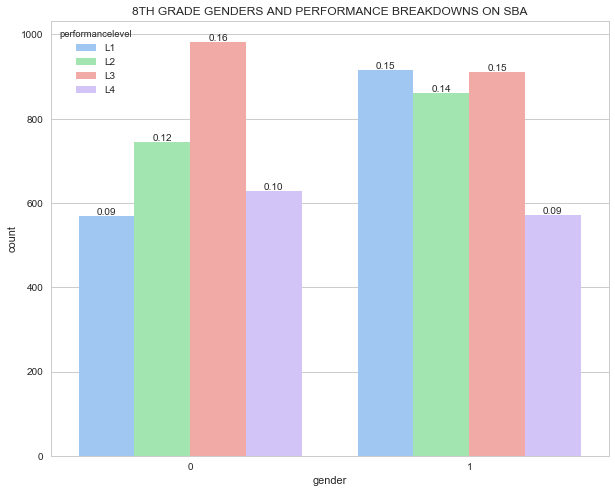

In [20]:
am_assess_8 = am_enroll_assess.loc[(am_enroll_assess['testgrade'] == 8) & (am_enroll_assess['testtype']=='SBA')]
total = float(len(am_assess_8))
rcParams['figure.figsize'] = 10, 8
ax = sb.countplot(x='gender',data=am_assess_8, hue='performancelevel', hue_order=('L1','L2','L3','L4'), palette='pastel')
plt.title('8TH GRADE GENDERS AND PERFORMANCE BREAKDOWNS ON SBA')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 

In [21]:
#Clean up some assess dataframes from memory
del am_assess_clean
del am_enroll_assess
del am_assess_8
del assess_agg

print ('Finished')

Finished


## A Look at Grades

> We will just do a grade breakdown analysis<br><br>
This will show a bar for each year in the data with the breakdown of grades.  The first graph will be for all student, and the second will look at only the Intensified Algebra students. This may not reveal anything new, but it is an example of what we can do.

> Each section has a table with total counts by year and letter grade.

> * The color scheme here is completely arbitrary but has some meaning
* Red is supposed to be a danger warning.
* Yellow is caution, getting close to danger.
* Greyish color is somewhat neutral.
* Greens are good, darker is A and therefore better.


In [431]:
#Grab the Grades data
am_grades_clean = pd.read_csv('clean_data/am_grades_clean.csv')

print ("Finished")

Finished


In [432]:
#Prepare dataset for chart

am_grades_clean['grade_a'] = np.where((am_grades_clean['lettergrade'] <= 4)&(am_grades_clean['lettergrade'] >= 3.7),1,0)
am_grades_clean['grade_b'] = np.where((am_grades_clean['lettergrade'] < 3.7)&(am_grades_clean['lettergrade'] >= 2.7),1,0)
am_grades_clean['grade_c'] = np.where((am_grades_clean['lettergrade'] < 2.7)&(am_grades_clean['lettergrade'] >= 1.7),1,0)
am_grades_clean['grade_d'] = np.where((am_grades_clean['lettergrade'] < 1.7)&(am_grades_clean['lettergrade'] >= 1),1,0)
am_grades_clean['grade_0'] = np.where((am_grades_clean['lettergrade'] <= 1),1,0)


grades_agg = am_grades_clean.groupby(['schoolyear']).agg({'grade_0': 'sum','grade_d': 'sum','grade_c': 'sum'
                                                       ,'grade_b': 'sum','grade_a': 'sum'})


#grades_agg.info()
grades_agg

,grade_0,grade_d,grade_c,grade_b,grade_a
schoolyear,,,,,
2014,30748,31956,57964,75440,79608
2015,38531,37032,64473,80843,83992
2016,39407,37349,64241,80175,83317


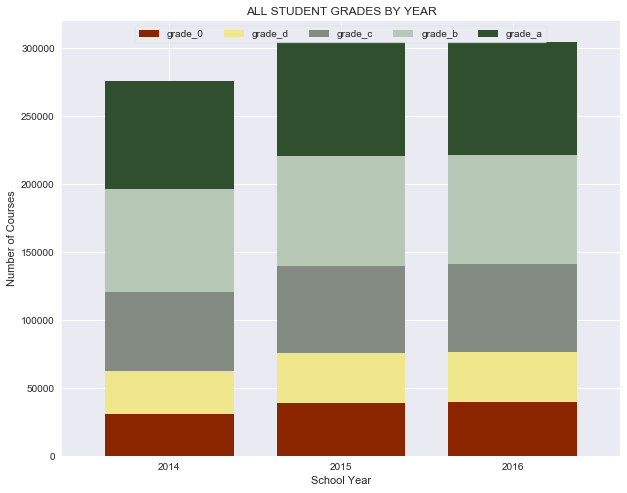

In [433]:
sb.set(style="darkgrid")

gr_plot = grades_agg.plot(kind='bar',stacked=True,figsize=(10,8),width=.75,
                        color=['#8B2500','#F0E68C','#838B83','#B7C8B6','#2F4F2F'])

gr_plot.set_xlabel('School Year')
plt.xticks(rotation=0)
#gr_plot.xlabels('Grade A','Grade B', 'Grade C','Grade D','Need Improvement')
gr_plot.set_ylabel('Number of Courses')
gr_plot.set_title('ALL STUDENT GRADES BY YEAR')
gr_plot.legend(ncol=5,loc='upper center',frameon=True)

In [434]:
#Prepare dataset for chart

am_grades_clean['grade_a'] = np.where((am_grades_clean['lettergrade'] <= 4)&(am_grades_clean['lettergrade'] >= 3.7),1,0)
am_grades_clean['grade_b'] = np.where((am_grades_clean['lettergrade'] < 3.7)&(am_grades_clean['lettergrade'] >= 2.7),1,0)
am_grades_clean['grade_c'] = np.where((am_grades_clean['lettergrade'] < 2.7)&(am_grades_clean['lettergrade'] >= 1.7),1,0)
am_grades_clean['grade_d'] = np.where((am_grades_clean['lettergrade'] < 1.7)&(am_grades_clean['lettergrade'] >= 1),1,0)

grades_ia = am_grades_clean.loc[am_grades_clean['is_ia'] == 1]

grades_agg_ia = grades_ia.groupby(['schoolyear']).agg({'grade_0': 'sum','grade_d': 'sum','grade_c': 'sum'
                                                       ,'grade_b': 'sum','grade_a': 'sum'})


#grades_agg_ia.info()
grades_agg_ia

,grade_0,grade_d,grade_c,grade_b,grade_a
schoolyear,,,,,
2014,34,94,177,124,48
2015,37,93,140,117,87
2016,100,194,251,199,106


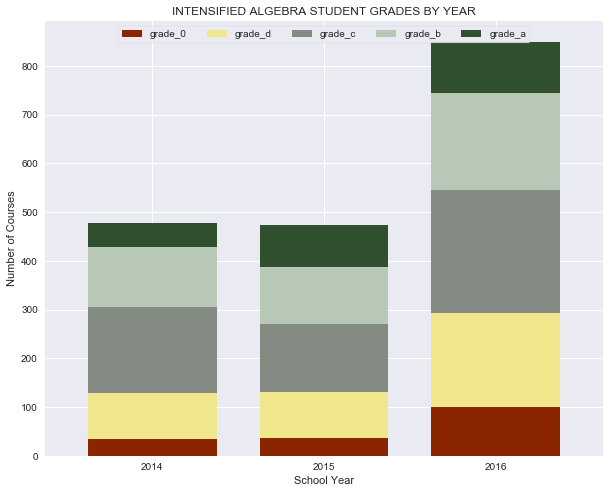

In [435]:
sb.set(style="darkgrid")

gr_plot = grades_agg_ia.plot(kind='bar',stacked=True,figsize=(10,8),width = .75, 
                             color=['#8B2500','#F0E68C','#838B83','#B7C8B6','#2F4F2F'])

gr_plot.set_xlabel('School Year')
plt.xticks(rotation=0)
gr_plot.set_ylabel('Number of Courses')
gr_plot.set_title('INTENSIFIED ALGEBRA STUDENT GRADES BY YEAR')
gr_plot.legend(ncol=5,loc='upper center',frameon=True)

## That's it for now

> Answers to many more questions are possible with the data available, and of course this doesn't include any linear regressions with crosschecks as Benjamin has talked about.  Still working some of that out.